<a href="https://colab.research.google.com/github/safdaralipoor/safdaralipoor/blob/main/first_projact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from PIL import Image


In [2]:
!pip install opendatasets
import opendatasets as od

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls "/content/drive/MyDrive/crop-data"

car  non-car


In [5]:
datadir="/content/drive/MyDrive/crop-data"
car_category="/content/drive/MyDrive/crop-data/car"
non_car_category="/content/drive/MyDrive/crop-data/non-car"
import cv2

In [6]:
data=[]
labels=[]

In [7]:
import os
import cv2
from skimage.transform import resize  # Import the resize function
import numpy as np

In [8]:
for category in [car_category, non_car_category]:
    path = os.path.join(datadir, category)

    # Check if the directory exists
    if os.path.exists(path):
        label = 1 if category == car_category else 0

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = resize(img_array, (100, 100, 3))  # Adjust the size as needed
            flattened_img = img_resized.flatten()

            data.append(flattened_img)
            labels.append(label)
    else:
        print(f'Directory not found: {path}')

In [9]:
X = np.array(data)
y = np.array(labels)

In [18]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (3184, 30000)
Shape of y: (3184,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Use SVC for classification
svm_model = svm.SVC(kernel='linear')  # Specify the kernel you want to use (linear in this case)
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [16]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [17]:
import matplotlib.pyplot as plt


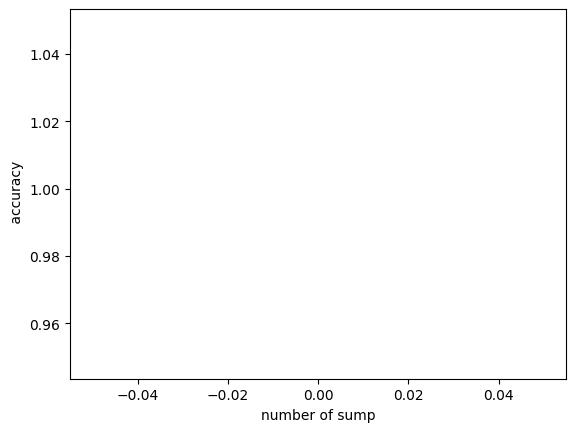

In [14]:
plt.plot(accuracy)
plt.xlabel("number of sump")
plt.ylabel(" accuracy")
plt.show()